Problem Statement:
Pick up the following stocks and generate forecasts accordingly Stocks:
1. NASDAQ.AAPL 2. NASDAQ.ADP 3. NASDAQ.CBOE 4. NASDAQ.CSCO 5. NASDAQ.EBAY

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sb 

sb.set_style('darkgrid')

In [2]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


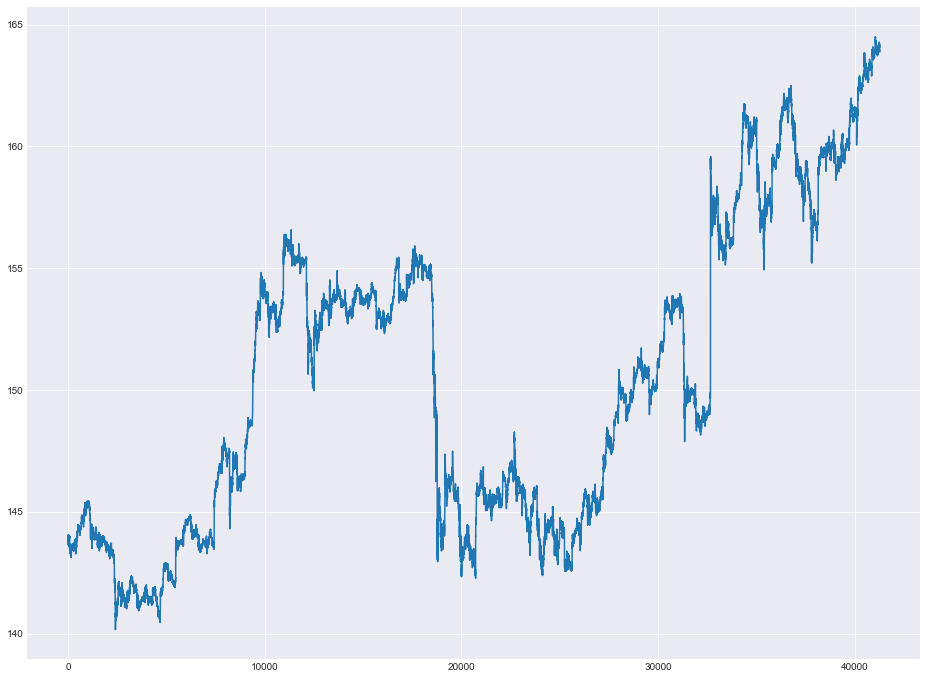

In [4]:
 df['NASDAQ.AAPL'].plot(figsize=(16, 12))

Check Stationarity of the series

In [5]:
from statsmodels.tsa.stattools import adfuller

def get_mean_var(series, no_of_samples):
    split_size = int(len(series) / no_of_samples)
    start = 0
    for i in range(no_of_samples):
        sample_series = series[i*split_size:(i+1)*split_size]
        print('Mean= %.2f, Variance= %.2f' % (sample_series.mean(), sample_series.var()))

def plot_rolling_statistics(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=1000).mean()
    rolstd = timeseries.rolling(window=1000).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure(figsize=(10,20))

    plt.show()
    
    

def dickey_fuller_test(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC') # Akaike information criterion
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    
def test_stationarity(timeseries):
    
    plot_rolling_statistics(timeseries)
    dickey_fuller_test(timeseries)
    
def find_best_model():

    p=0
    q=0
    d=1

    pdq=[]
    aic=[]

    for p in range(3):
        for q in range(4):
            try:
                model = sm.tsa.ARIMA(ararray, (p,d,q)).fit()
                x = model.aic
                x1 = (p,d,q)
            
                print (x1, x)
                aic.append(x)
                pdq.append(x1)
            except:
                pass
        
    keys = pdq
    values = aic
    d = dict(zip(keys, values))

# Best Model

    minaic=min(d, key=d.get)
    print ("\nBest Model is :", minaic)
    return(minaic)

In [6]:
get_mean_var(df['NASDAQ.AAPL'].values, 10)

Mean= 142.97, Variance= 1.74
Mean= 143.86, Variance= 3.32
Mean= 152.13, Variance= 11.20
Mean= 153.31, Variance= 0.52
Mean= 149.90, Variance= 24.46
Mean= 145.30, Variance= 1.09
Mean= 146.29, Variance= 5.95
Mean= 151.48, Variance= 5.94
Mean= 158.91, Variance= 4.12
Mean= 160.38, Variance= 4.54


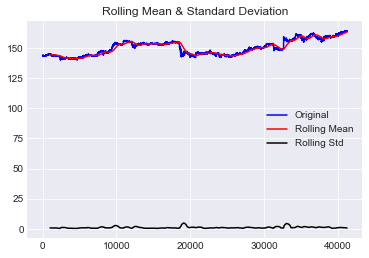

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                    -0.912853
p-value                            0.783710
#Lags Used                        31.000000
Number of Observations Used    41234.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [7]:
test_stationarity(df['NASDAQ.AAPL'])

The above values are not stationary since the p-value is higher and the values of mean are increasing.

Use differencing to stationarize the values 

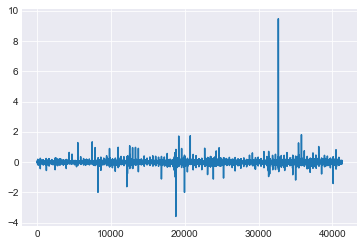

In [8]:
df['First Difference'] = df['NASDAQ.AAPL'] - df['NASDAQ.AAPL'].shift()
df['First Difference'].plot()

Test the stationarity of the new series after differentiation

In [9]:
get_mean_var(df['First Difference'].values, 20)

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.01
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.01
Mean= 0.00, Variance= 0.01
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.03
Mean= 0.00, Variance= 0.01
Mean= -0.00, Variance= 0.01
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.05
Mean= 0.00, Variance= 0.01
Mean= -0.00, Variance= 0.01
Mean= 0.00, Variance= 0.01
Mean= 0.00, Variance= 0.01


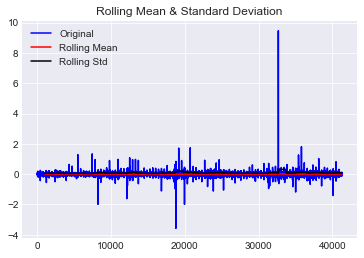

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -35.737741
p-value                            0.000000
#Lags Used                        30.000000
Number of Observations Used    41234.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [10]:
test_stationarity(df['First Difference'][1:])

The series is not stationary yet since there is still no consistent pattern. So perform log transformations 

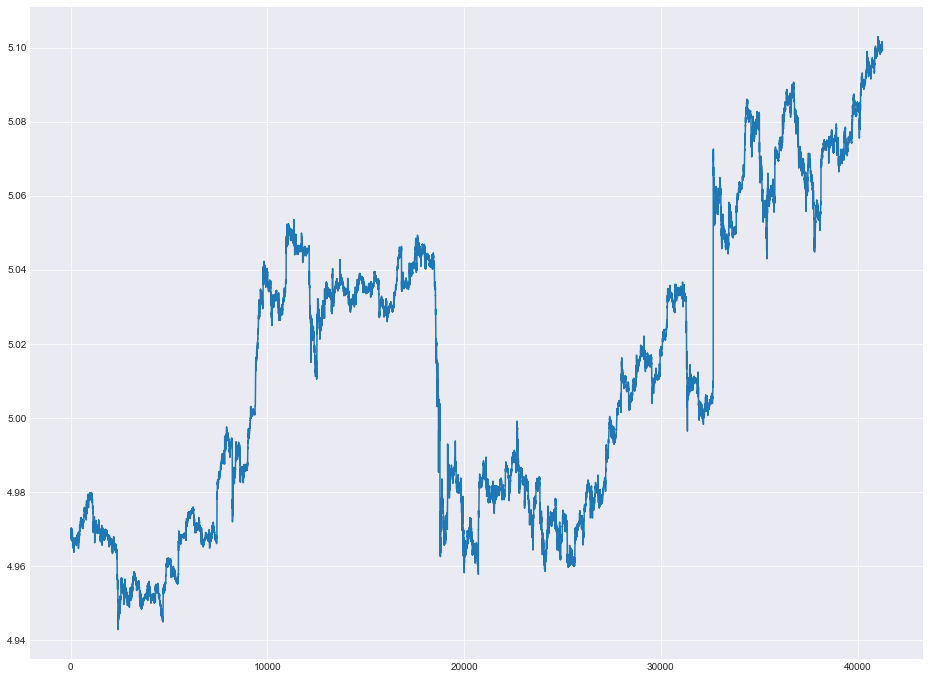

In [11]:
df['Natural Log'] = df['NASDAQ.AAPL'].apply(lambda x: np.log(x))
df['Natural Log'].plot(figsize=(16, 12))

Check stationarity again

Mean= 4.97, Variance= 0.00
Mean= 4.95, Variance= 0.00
Mean= 4.96, Variance= 0.00
Mean= 4.98, Variance= 0.00
Mean= 5.01, Variance= 0.00
Mean= 5.04, Variance= 0.00
Mean= 5.03, Variance= 0.00
Mean= 5.03, Variance= 0.00
Mean= 5.04, Variance= 0.00
Mean= 4.98, Variance= 0.00
Mean= 4.98, Variance= 0.00
Mean= 4.98, Variance= 0.00
Mean= 4.97, Variance= 0.00
Mean= 5.00, Variance= 0.00
Mean= 5.02, Variance= 0.00
Mean= 5.02, Variance= 0.00
Mean= 5.06, Variance= 0.00
Mean= 5.07, Variance= 0.00
Mean= 5.07, Variance= 0.00
Mean= 5.09, Variance= 0.00


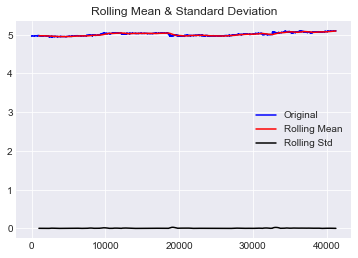

<Figure size 720x1440 with 0 Axes>

In [12]:
get_mean_var(df['Natural Log'].values, 20)
plot_rolling_statistics(df['Natural Log'])

The series is not stationary still. So combine both the options

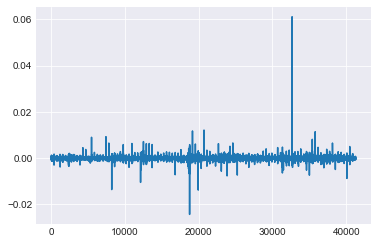

In [13]:
df['Logged First Difference'] = df['Natural Log'] - df['Natural Log'].shift(1)
df['Logged First Difference'].plot()

Check the stationarity of the new series 

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


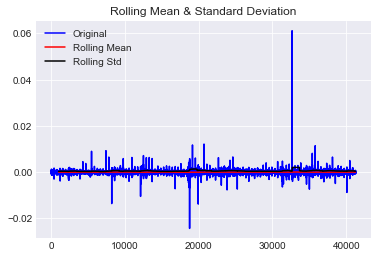

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -35.706087
p-value                            0.000000
#Lags Used                        30.000000
Number of Observations Used    41234.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [14]:
get_mean_var(df['Logged First Difference'].values, 20)
test_stationarity(df['Logged First Difference'][1:])

Plot ACF and PACF for the values 

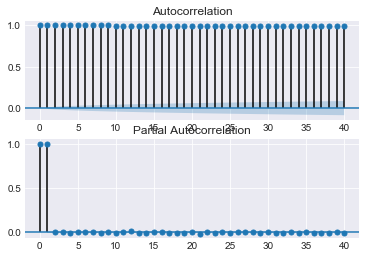

In [15]:
# Plot of the actual values 
%matplotlib inline
fig = plt.figure()

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['NASDAQ.AAPL'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['NASDAQ.AAPL'].values.squeeze(), lags=40, ax=ax2)

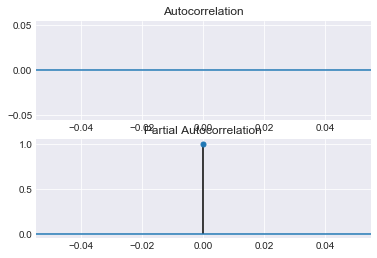

In [16]:
# Plot the values for Logged first difference.

%matplotlib inline
fig = plt.figure()

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Logged First Difference'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Logged First Difference'].values.squeeze(), lags=40, ax=ax2)

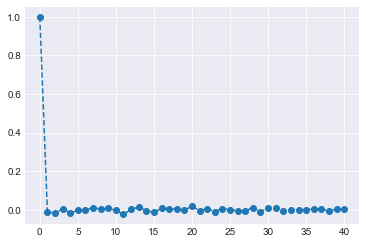

In [17]:
# Plot the correlations
from statsmodels.tsa.stattools import acf 
from statsmodels.tsa.stattools import pacf
    
lag_correlations = acf(df['Logged First Difference'].iloc[1:])
lag_partial_correlations = pacf(df['Logged First Difference'].iloc[1:])

fig, ax = plt.subplots()
ax.plot(lag_correlations, marker='o', linestyle='--')

Get the Durbin-Watson Values

In [18]:
# DW values for the original values
sm.stats.durbin_watson(df['NASDAQ.AAPL'][1:])

3.8592950780363566e-07

In [19]:
# DW values for the logged difference 

sm.stats.durbin_watson(df['Logged First Difference'][1:])

2.018442039864313

The Durbin Watson value is around 2. So the errors are not correlated. 

Build the ARIMA model

In [20]:
import statsmodels.api as sm

df.index = pd.DatetimeIndex(freq='d',start=0,periods=41266)

In [21]:
# Determine the best values for p and q

ararray = (df['NASDAQ.AAPL'].dropna())
minaic=find_best_model()

(0, 1, 0) -78429.72801910112
(0, 1, 1) -78432.15564614668
(0, 1, 2) -78443.492688197
(0, 1, 3) -78442.45834556624
(1, 1, 0) -78431.99787673421
(1, 1, 1) -78439.03878692645
(1, 1, 2) -78446.44721801818
(2, 1, 0) -78443.25287041412
(2, 1, 1) -78446.29165066703

Best Model is : (1, 1, 2)


In [22]:
print(minaic)

(1, 1, 2)


In [23]:
# Train the model 

p=minaic[0]
d=minaic[1]
q=minaic[2]
ARIMIAmod = sm.tsa.ARIMA(ararray, (p,d,q)).fit()

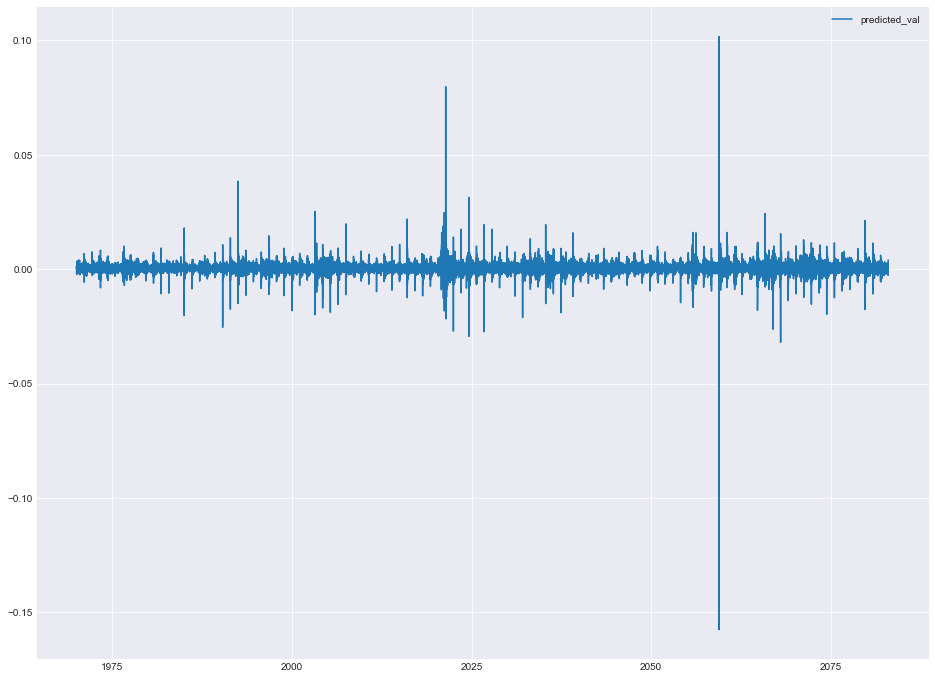

In [24]:
df['predicted_val'] = ARIMIAmod.predict()
df[['predicted_val']].plot(figsize=(16, 12))

Get Model for NASDAQ.ADP

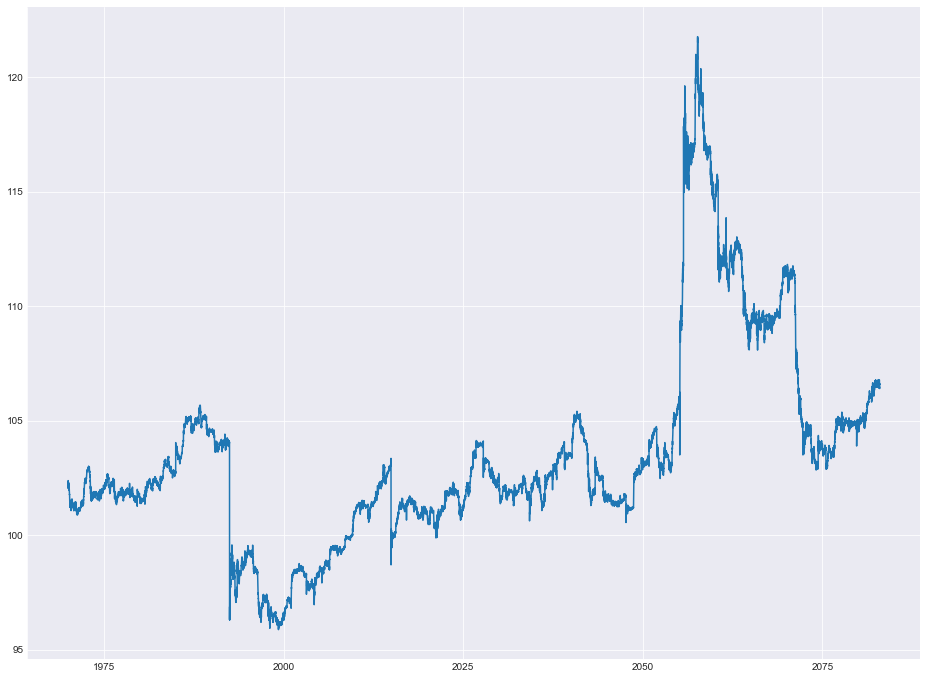

In [25]:
 df['NASDAQ.ADP'].plot(figsize=(16, 12))

In [26]:
get_mean_var(df['NASDAQ.ADP'].values, 10)

Mean= 101.82, Variance= 0.17
Mean= 103.77, Variance= 1.38
Mean= 97.74, Variance= 0.98
Mean= 100.29, Variance= 2.21
Mean= 101.29, Variance= 0.41
Mean= 102.40, Variance= 0.50
Mean= 102.67, Variance= 1.61
Mean= 109.57, Variance= 44.12
Mean= 110.55, Variance= 2.25
Mean= 104.71, Variance= 0.91


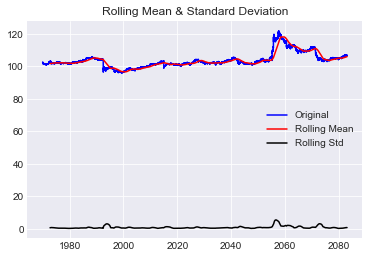

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                    -1.704174
p-value                            0.428963
#Lags Used                        39.000000
Number of Observations Used    41226.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [27]:
test_stationarity(df['NASDAQ.ADP'])

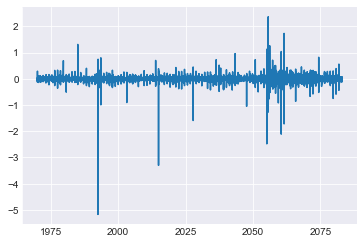

In [28]:
df['First Diff ADP'] = df['NASDAQ.ADP'] - df['NASDAQ.ADP'].shift()
df['First Diff ADP'].plot()

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.02
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.01
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.01, Variance= 0.03
Mean= -0.00, Variance= 0.02
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


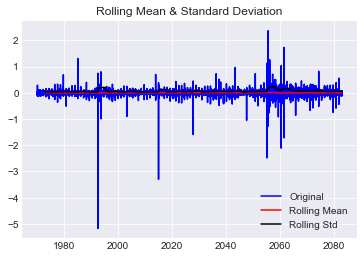

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -31.055662
p-value                            0.000000
#Lags Used                        38.000000
Number of Observations Used    41226.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [29]:
# Check for stationarity after difference

get_mean_var(df['First Diff ADP'].values, 20)
test_stationarity(df['First Diff ADP'][1:])

The Variance is still varying. So apply logarithmic transformation

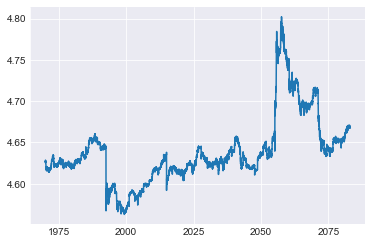

In [30]:
df['Natural LogADP'] = df['NASDAQ.ADP'].apply(lambda x: np.log(x))
df['Natural LogADP'].plot()

Mean= 4.62, Variance= 0.00
Mean= 4.62, Variance= 0.00
Mean= 4.64, Variance= 0.00
Mean= 4.65, Variance= 0.00
Mean= 4.59, Variance= 0.00
Mean= 4.58, Variance= 0.00
Mean= 4.60, Variance= 0.00
Mean= 4.62, Variance= 0.00
Mean= 4.62, Variance= 0.00
Mean= 4.62, Variance= 0.00
Mean= 4.63, Variance= 0.00
Mean= 4.63, Variance= 0.00
Mean= 4.64, Variance= 0.00
Mean= 4.62, Variance= 0.00
Mean= 4.64, Variance= 0.00
Mean= 4.75, Variance= 0.00
Mean= 4.71, Variance= 0.00
Mean= 4.70, Variance= 0.00
Mean= 4.65, Variance= 0.00
Mean= 4.66, Variance= 0.00


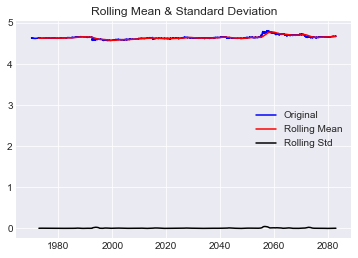

<Figure size 720x1440 with 0 Axes>

In [31]:
get_mean_var(df['Natural LogADP'].values, 20)

plot_rolling_statistics(df['Natural LogADP'])

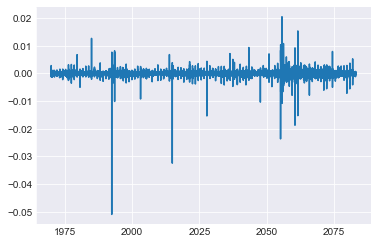

In [32]:
df['Logged First DiffADP'] = df['Natural LogADP'] - df['Natural LogADP'].shift(1)
df['Logged First DiffADP'].plot()

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


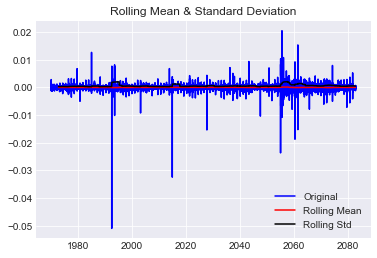

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -30.760414
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    41225.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [33]:
get_mean_var(df['Logged First DiffADP'].values, 20)

# plot
test_stationarity(df['Logged First DiffADP'][1:])

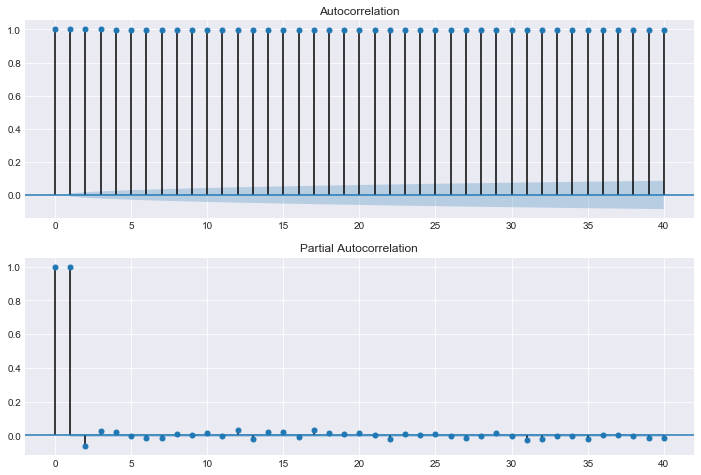

In [34]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['NASDAQ.ADP'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['NASDAQ.ADP'].values.squeeze(), lags=40, ax=ax2)

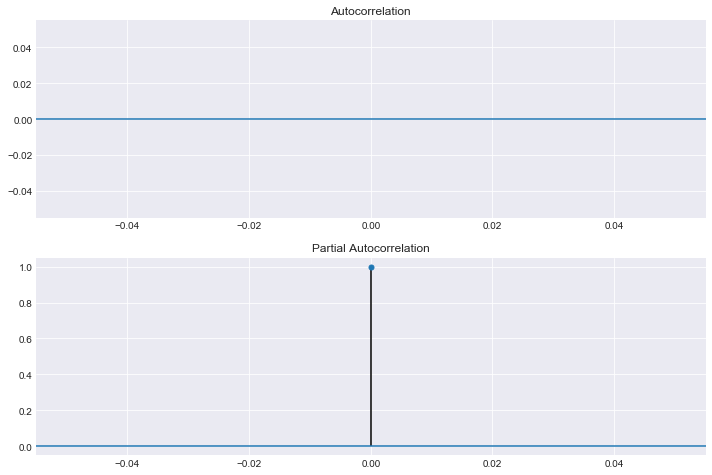

In [35]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Logged First DiffADP'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Logged First DiffADP'].values.squeeze(), lags=40, ax=ax2)

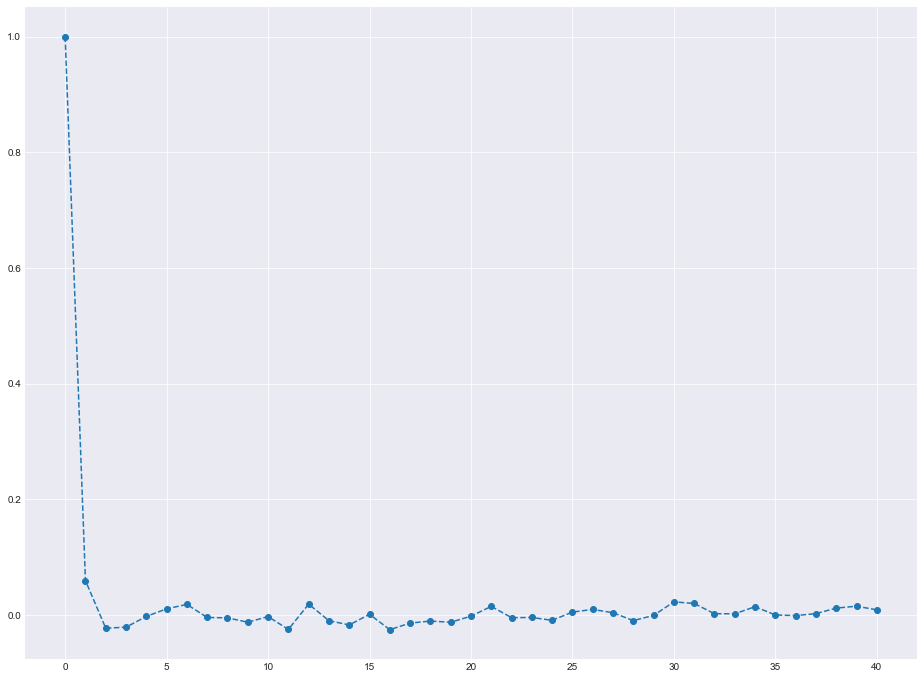

In [36]:
lag_correlADP = acf(df['Logged First DiffADP'].iloc[1:])
lag_partial_correlADP = pacf(df['Logged First DiffADP'].iloc[1:])

fig, ax = plt.subplots(figsize=(16,12))
ax.plot(lag_correlADP, marker='o', linestyle='--')

In [37]:
sm.stats.durbin_watson(df['NASDAQ.ADP'][1:])

5.150393740408954e-07

In [38]:
sm.stats.durbin_watson(df['Logged First DiffADP'][1:])

1.8805311236919464

Since the value of DW value is very much nearer to 2, there is no serious serial correlation

In [39]:
ararray = (df['NASDAQ.ADP'].dropna())
minaic = find_best_model()

(0, 1, 0) -97402.88015237625
(0, 1, 1) -97541.72532925202
(0, 1, 2) -97556.28548904776
(0, 1, 3) -97569.8070087303
(1, 1, 0) -97535.2920296235
(1, 1, 1) -97549.4612756863
(1, 1, 2) -97562.57763717134
(1, 1, 3) -97567.80756566778
(2, 1, 0) -97560.41891654258
(2, 1, 1) -97565.55086862942
(2, 1, 2) -97576.122847742
(2, 1, 3) -97585.04144288113

Best Model is : (2, 1, 3)


In [40]:
p=minaic[0]
d=minaic[1]
q=minaic[2]
    
ARIMIAmodADP = sm.tsa.ARIMA(ararray, (p,d,q)).fit()

In [41]:
df['predicted_valADP'] = ARIMIAmodADP.predict()

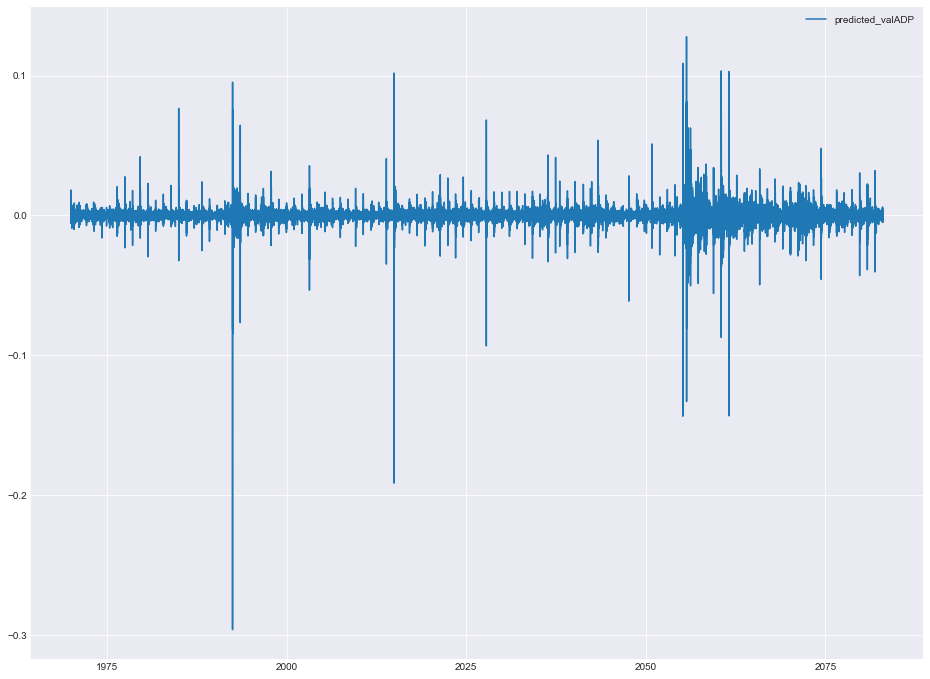

In [42]:
df[['predicted_valADP']].plot(figsize=(16, 12))

Get Model for NASDAQ.CBOE

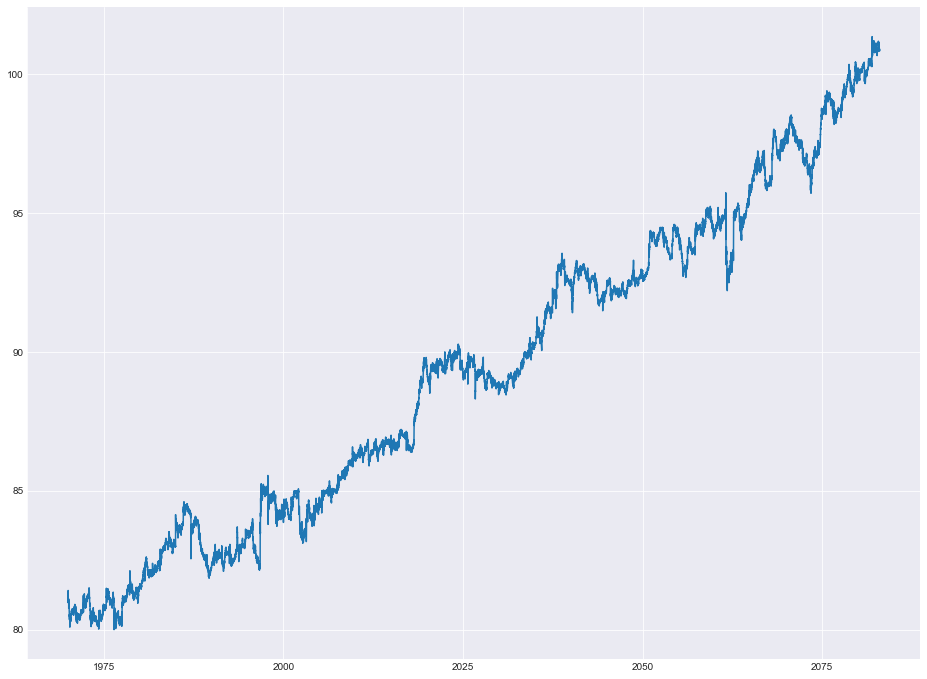

In [43]:
 df['NASDAQ.CBOE'].plot(figsize=(16, 12))

Mean= 80.96, Variance= 0.30
Mean= 83.00, Variance= 0.48
Mean= 83.86, Variance= 0.70
Mean= 85.76, Variance= 0.69
Mean= 88.67, Variance= 1.56
Mean= 89.70, Variance= 0.90
Mean= 92.48, Variance= 0.16
Mean= 93.88, Variance= 0.48
Mean= 96.04, Variance= 2.28
Mean= 98.90, Variance= 1.89


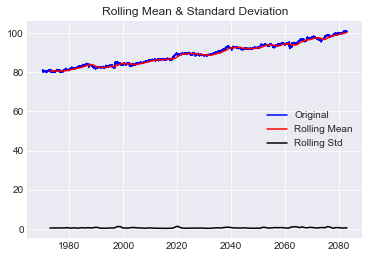

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                     0.166339
p-value                            0.970309
#Lags Used                        27.000000
Number of Observations Used    41238.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [44]:
get_mean_var(df['NASDAQ.CBOE'].values, 10)
test_stationarity(df['NASDAQ.CBOE'])

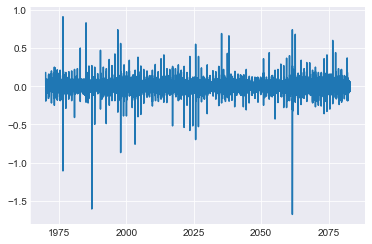

In [45]:
# Difference the series 

df['First DiffCBOE'] = df['NASDAQ.CBOE'] - df['NASDAQ.CBOE'].shift()
df['First DiffCBOE'].plot()

Mean= nan, Variance= nan
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.01
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


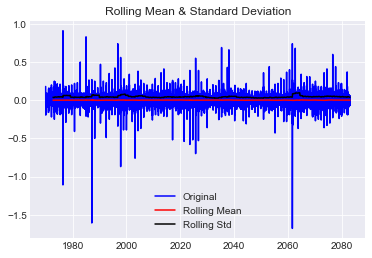

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -41.642094
p-value                            0.000000
#Lags Used                        26.000000
Number of Observations Used    41238.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [46]:
# Check the stationarity after first difference

get_mean_var(df['First DiffCBOE'].values, 20)
test_stationarity(df['First DiffCBOE'][1:])

Perform the Logarithmic transformation

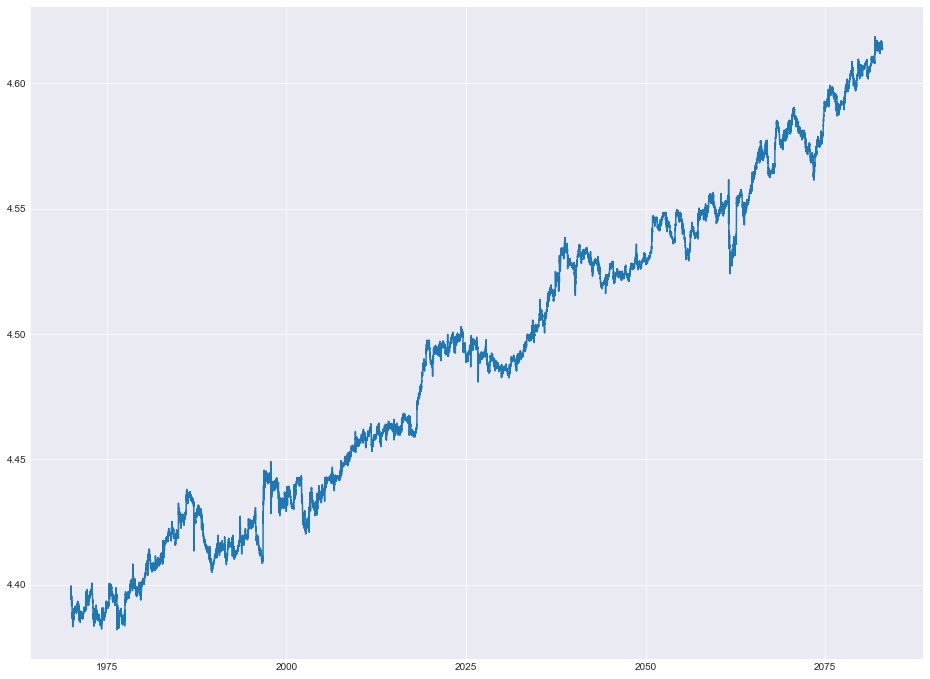

In [47]:
df['Natural LogCBOE'] = df['NASDAQ.CBOE'].apply(lambda x: np.log(x))
df['Natural LogCBOE'].plot(figsize=(16, 12))

In [48]:
get_mean_var(df['Natural LogCBOE'].values, 20)

Mean= 4.39, Variance= 0.00
Mean= 4.40, Variance= 0.00
Mean= 4.42, Variance= 0.00
Mean= 4.42, Variance= 0.00
Mean= 4.42, Variance= 0.00
Mean= 4.43, Variance= 0.00
Mean= 4.44, Variance= 0.00
Mean= 4.46, Variance= 0.00
Mean= 4.47, Variance= 0.00
Mean= 4.50, Variance= 0.00
Mean= 4.49, Variance= 0.00
Mean= 4.50, Variance= 0.00
Mean= 4.53, Variance= 0.00
Mean= 4.52, Variance= 0.00
Mean= 4.54, Variance= 0.00
Mean= 4.54, Variance= 0.00
Mean= 4.55, Variance= 0.00
Mean= 4.58, Variance= 0.00
Mean= 4.58, Variance= 0.00
Mean= 4.61, Variance= 0.00


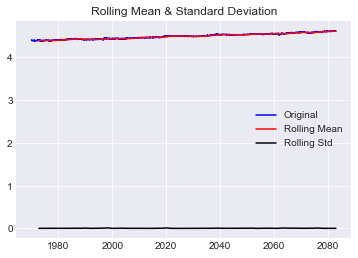

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                    -0.030919
p-value                            0.955899
#Lags Used                        26.000000
Number of Observations Used    41238.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [49]:
test_stationarity(df['Natural LogCBOE'][1:])

Combine the difference and log transform

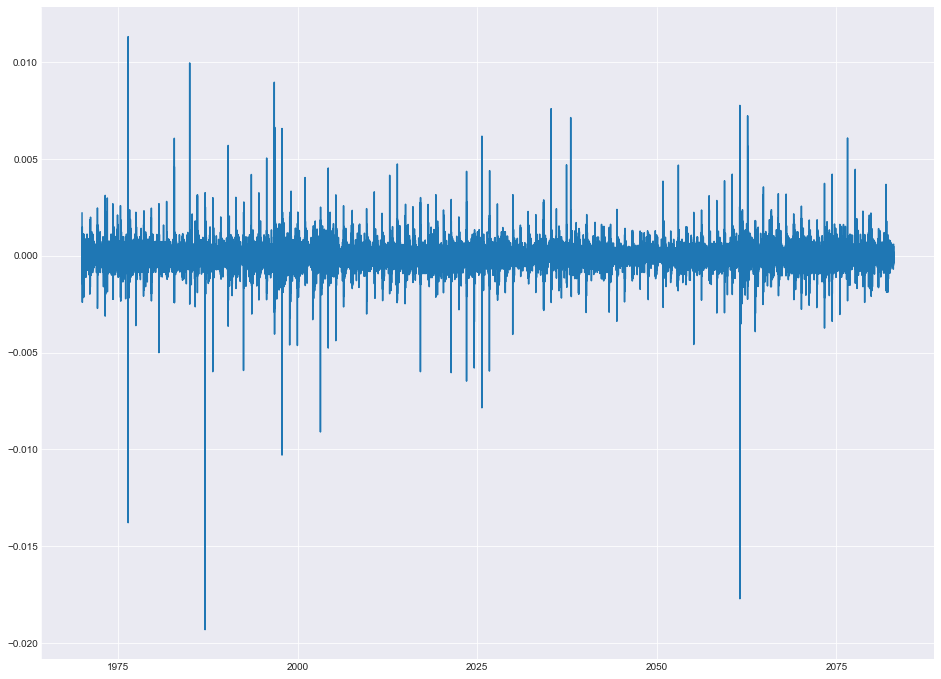

In [50]:
df['Logged First DiffCBOE'] = df['Natural LogCBOE'] - df['Natural LogCBOE'].shift(1)
df['Logged First DiffCBOE'].plot(figsize=(16, 12))

Mean= nan, Variance= nan
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


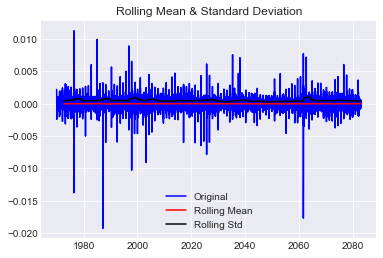

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -42.183172
p-value                            0.000000
#Lags Used                        25.000000
Number of Observations Used    41239.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [51]:
get_mean_var(df['Logged First DiffCBOE'].values, 20)
test_stationarity(df['Logged First DiffCBOE'][1:])

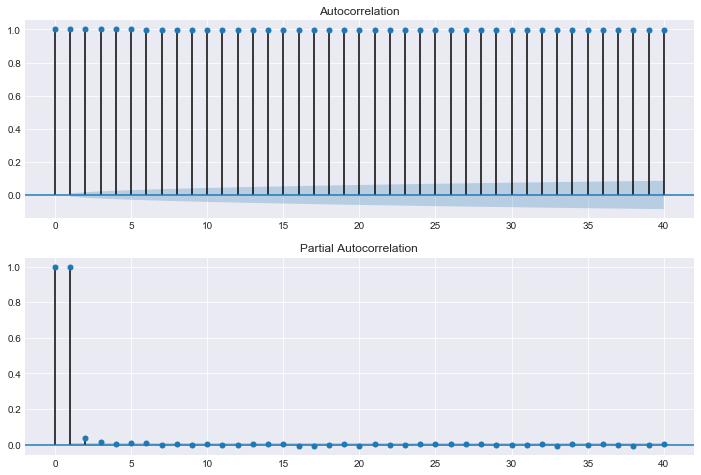

In [52]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['NASDAQ.CBOE'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['NASDAQ.CBOE'].values.squeeze(), lags=40, ax=ax2)

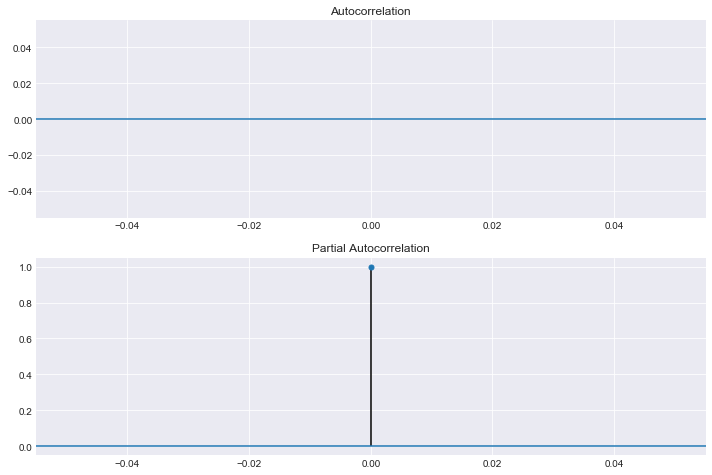

In [53]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Logged First DiffCBOE'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Logged First DiffCBOE'].values.squeeze(), lags=40, ax=ax2)

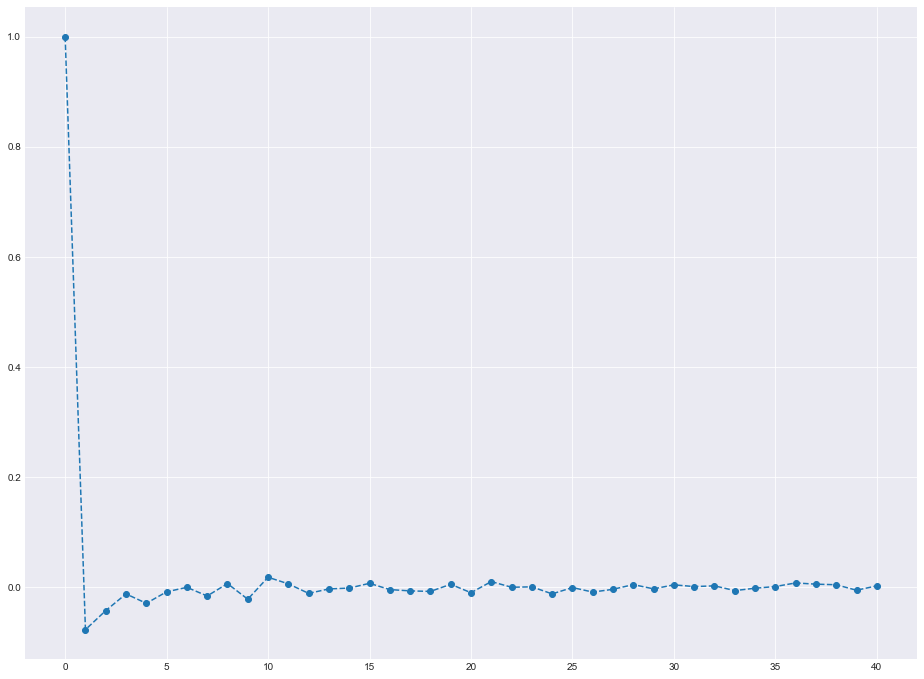

In [54]:
lag_correlCBOE = acf(df['Logged First DiffCBOE'].iloc[1:])
lag_partial_correlCBOE = pacf(df['Logged First DiffCBOE'].iloc[1:])
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(lag_correlCBOE, marker='o', linestyle='--')

In [55]:
sm.stats.durbin_watson(df['NASDAQ.CBOE'][1:])

2.710396606220063e-07

In [56]:
sm.stats.durbin_watson(df['Logged First DiffCBOE'][1:])

2.1531316991494767

In [57]:
ararray = (df['NASDAQ.CBOE'].dropna())
minaic = find_best_model()

(0, 1, 0) -135929.56155692766
(0, 1, 1) -136187.63017118745
(0, 1, 2) -136279.9743417074
(0, 1, 3) -136287.70894492668
(1, 1, 0) -136162.6309985531
(1, 1, 1) -136322.22070470089
(1, 1, 2) -136321.82819404485
(1, 1, 3) -136324.06471290605
(2, 1, 0) -136262.91354033304
(2, 1, 1) -136321.73278070352
(2, 1, 2) -136321.35005076719
(2, 1, 3) -136327.6080457255

Best Model is : (2, 1, 3)


In [58]:
p=minaic[0]
d=minaic[1]
q=minaic[2]
ARIMIAmodCBOE = sm.tsa.ARIMA(ararray, (p,d,q)).fit()

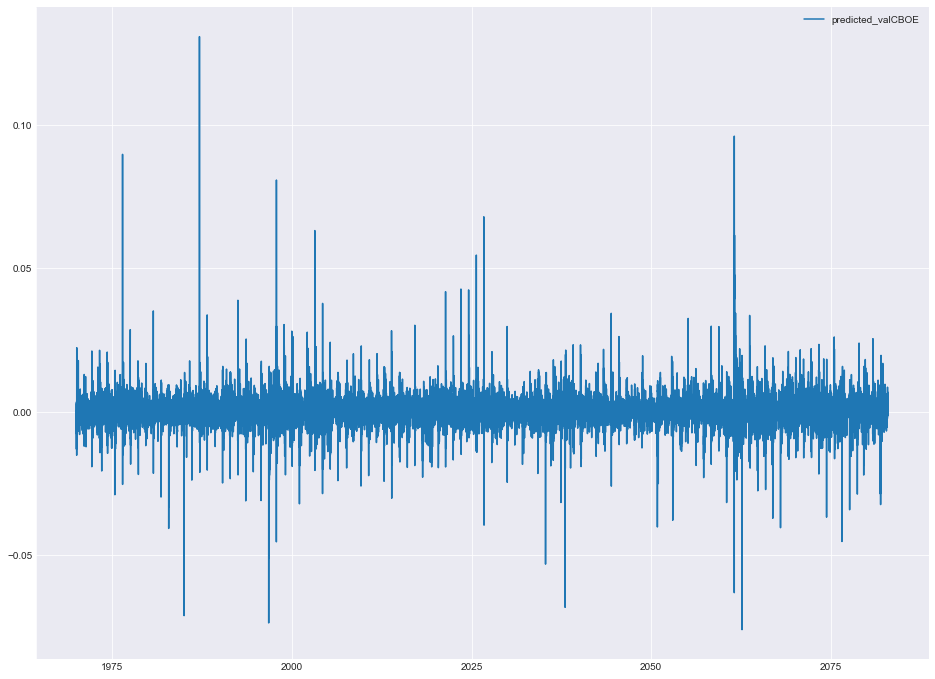

In [59]:
df['predicted_valCBOE'] = ARIMIAmodCBOE.predict()
df[['predicted_valCBOE']].plot(figsize=(16, 12))

Get predictions for NASDAQ.CSCO

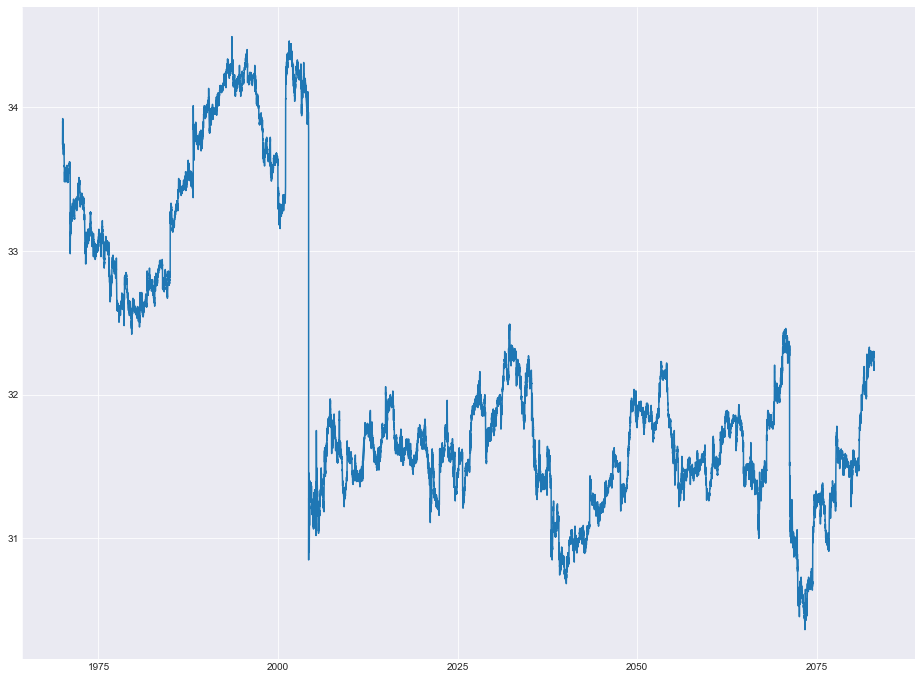

In [60]:
df['NASDAQ.CSCO'].plot(figsize=(16, 12))

Mean= 32.99, Variance= 0.11
Mean= 33.41, Variance= 0.26
Mean= 34.01, Variance= 0.11
Mean= 31.62, Variance= 0.23
Mean= 31.58, Variance= 0.03
Mean= 31.88, Variance= 0.08
Mean= 31.18, Variance= 0.06
Mean= 31.69, Variance= 0.06
Mean= 31.70, Variance= 0.10
Mean= 31.34, Variance= 0.24


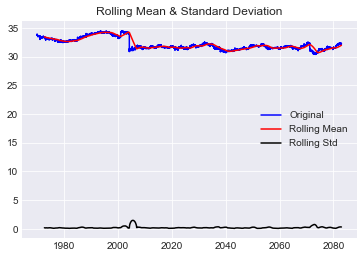

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                    -2.395555
p-value                            0.142995
#Lags Used                        47.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [61]:
get_mean_var(df['NASDAQ.CSCO'].values, 10)
test_stationarity(df['NASDAQ.CSCO'])

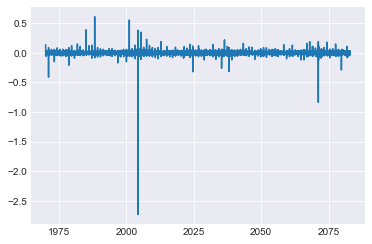

In [62]:
df['First DiffCSCO'] = df['NASDAQ.CSCO'] - df['NASDAQ.CSCO'].shift()
df['First DiffCSCO'].plot()

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


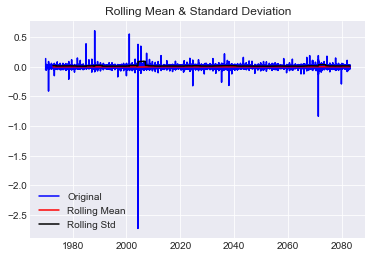

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -30.356683
p-value                            0.000000
#Lags Used                        46.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [63]:
get_mean_var(df['First DiffCSCO'].values, 20)
test_stationarity(df['First DiffCSCO'][1:])

Differencing has made the series stationary

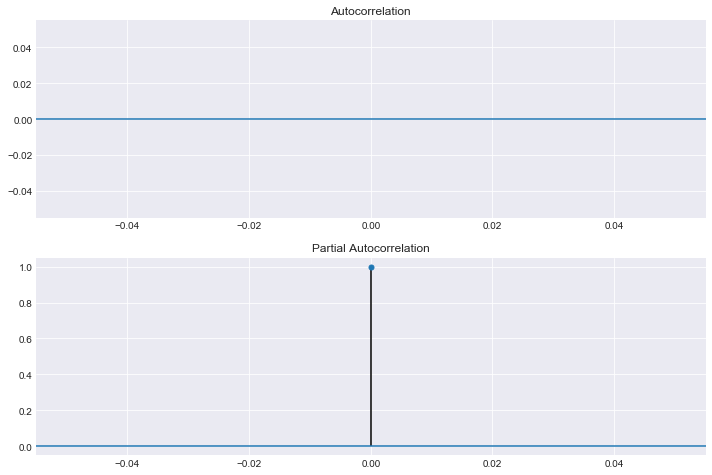

In [64]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['First DiffCSCO'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['First DiffCSCO'].values.squeeze(), lags=40, ax=ax2)

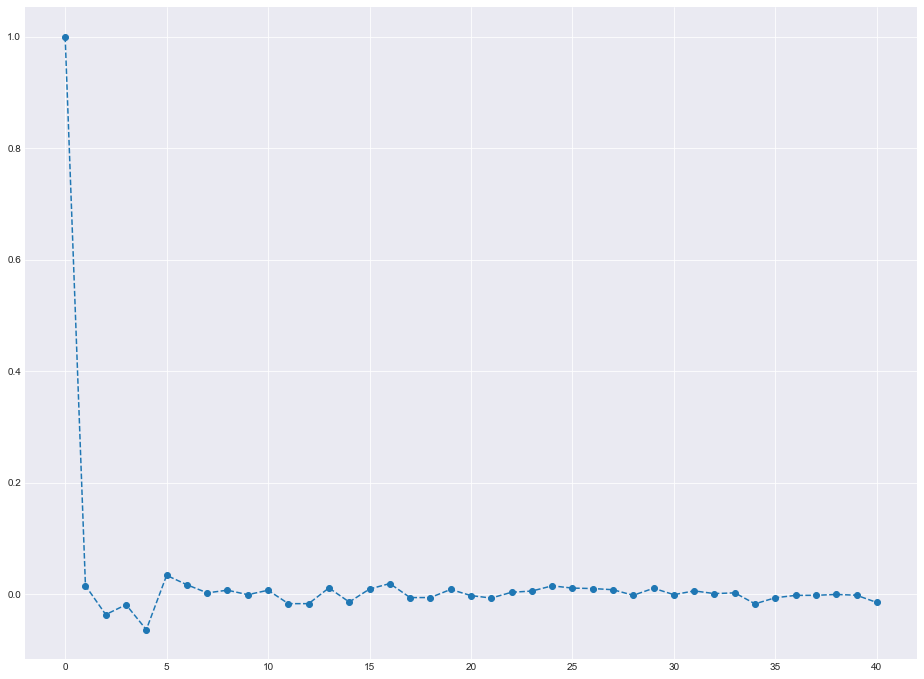

In [65]:
lag_correlCSCO = acf(df['First DiffCSCO'].iloc[1:])
lag_partial_correlCSCO = pacf(df['First DiffCSCO'].iloc[1:])
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(lag_correlCSCO, marker='o', linestyle='--')

In [66]:
sm.stats.durbin_watson(df['NASDAQ.CSCO'][1:])

4.4097905909347416e-07

In [67]:
sm.stats.durbin_watson(df['First DiffCSCO'][1:])

1.967766037248009

The value of Durbin Watson values is near to 2. So no serial correlation exists

In [68]:
ararray = (df['NASDAQ.CSCO'].dropna())
minaic = find_best_model()

(0, 1, 0) -200306.80085156747
(0, 1, 1) -200315.600349013
(0, 1, 2) -200374.9020897537
(0, 1, 3) -200380.84783090441
(1, 1, 0) -200314.8157544649
(1, 1, 1) -200391.89552891982
(1, 1, 2) -200407.99354538094
(1, 1, 3) -200407.65184770513
(2, 1, 0) -200368.48805457045
(2, 1, 1) -200410.27260631602
(2, 1, 2) -200441.31287133798
(2, 1, 3) -200447.09723189345

Best Model is : (2, 1, 3)


In [69]:
p=minaic[0]
d=minaic[1]
q=minaic[2]
ARIMIAmodCSCO = sm.tsa.ARIMA(ararray, (p,d,q)).fit()

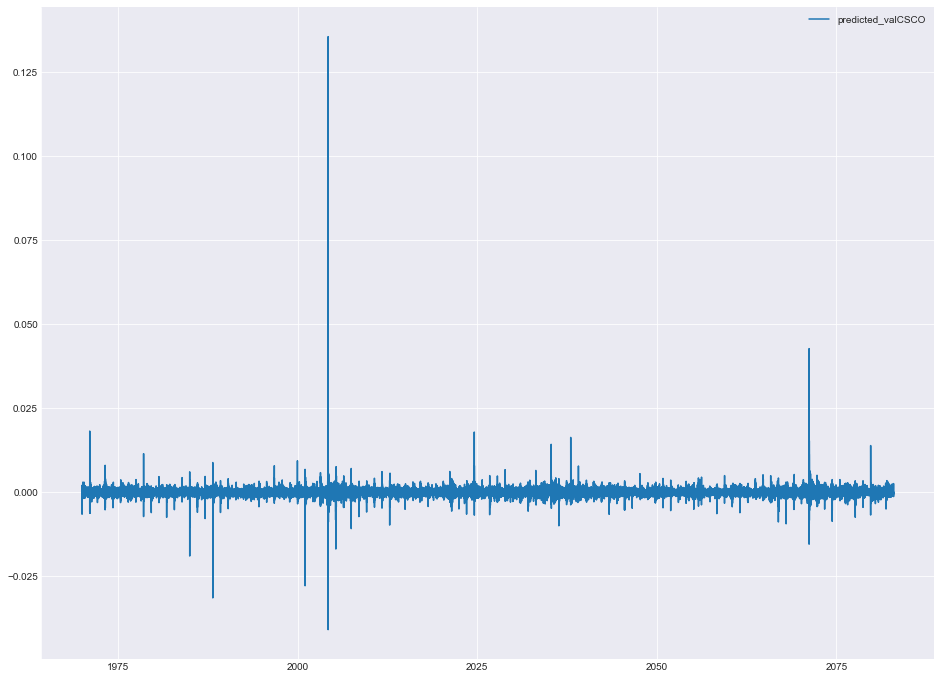

In [70]:
df['predicted_valCSCO'] = ARIMIAmodCSCO.predict()
df[['predicted_valCSCO']].plot(figsize=(16, 12))

Create a model for NASDAQ.EBAY

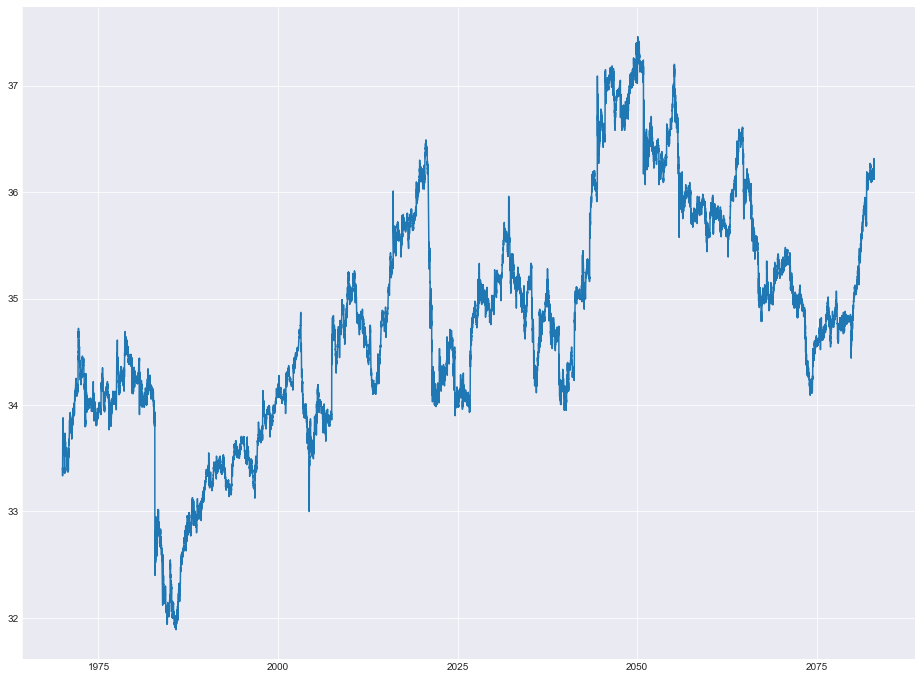

In [71]:
df['NASDAQ.EBAY'].plot(figsize=(16, 12))

In [72]:
get_mean_var(df['NASDAQ.EBAY'].values, 10)

Mean= 34.10, Variance= 0.07
Mean= 33.00, Variance= 0.39
Mean= 33.84, Variance= 0.15
Mean= 34.42, Variance= 0.22
Mean= 35.04, Variance= 0.62
Mean= 34.99, Variance= 0.11
Mean= 35.68, Variance= 1.16
Mean= 36.33, Variance= 0.24
Mean= 35.59, Variance= 0.19
Mean= 34.97, Variance= 0.26


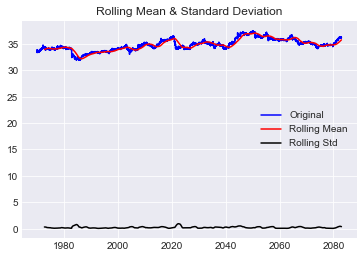

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                    -1.875762
p-value                            0.343548
#Lags Used                        47.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [73]:
test_stationarity(df['NASDAQ.EBAY'])

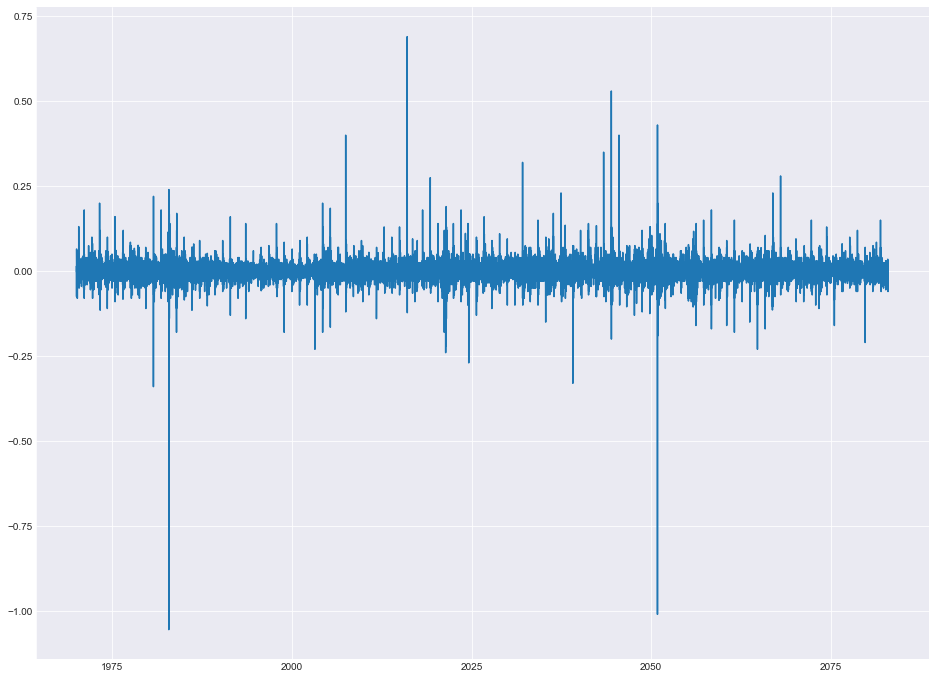

In [74]:
df['First DiffEBAY'] = df['NASDAQ.EBAY'] - df['NASDAQ.EBAY'].shift()
df['First DiffEBAY'].plot(figsize=(16, 12))

Mean= nan, Variance= nan
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= -0.00, Variance= 0.00
Mean= 0.00, Variance= 0.00


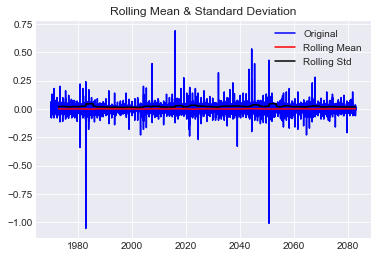

<Figure size 720x1440 with 0 Axes>

Results of Dickey-Fuller Test:
Test Statistic                   -30.679619
p-value                            0.000000
#Lags Used                        46.000000
Number of Observations Used    41218.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [75]:
get_mean_var(df['First DiffEBAY'].values, 20)
test_stationarity(df['First DiffEBAY'][1:])

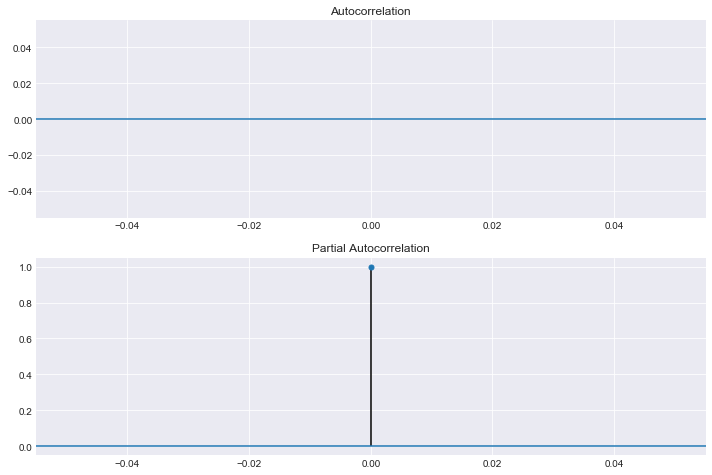

In [76]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['First DiffEBAY'].values.squeeze(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['First DiffEBAY'].values.squeeze(), lags=40, ax=ax2)

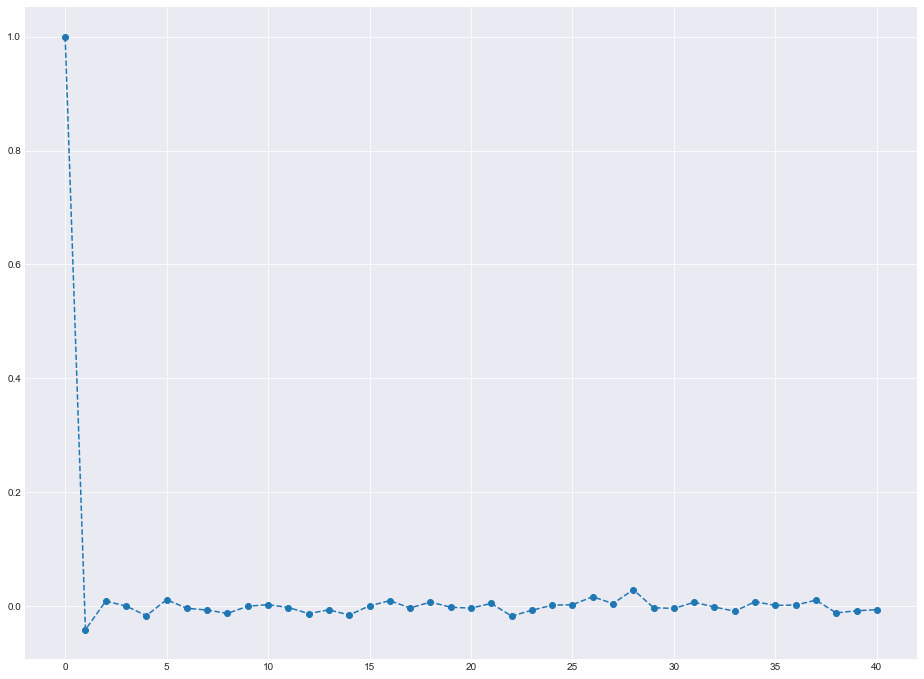

In [77]:
lag_correlEBAY = acf(df['First DiffEBAY'].iloc[1:])
lag_partial_correlCSCO = pacf(df['First DiffEBAY'].iloc[1:])
fig, ax = plt.subplots(figsize=(16,12))
ax.plot(lag_correlEBAY, marker='o', linestyle='--')

In [78]:
sm.stats.durbin_watson(df['NASDAQ.EBAY'][1:])

4.4542920662485257e-07

In [79]:
sm.stats.durbin_watson(df['First DiffEBAY'][1:])

2.0827114523787174

In [80]:
ararray = (df['NASDAQ.EBAY'].dropna())
minaic = find_best_model()

(0, 1, 0) -193381.93463551925
(0, 1, 1) -193449.52833413013
(0, 1, 2) -193450.64008076116
(0, 1, 3) -193448.71431391692
(1, 1, 0) -193450.6060510131
(1, 1, 1) -193450.269092688
(1, 1, 2) -193448.6553221905
(2, 1, 0) -193450.57006432017

Best Model is : (0, 1, 2)


In [81]:
p=minaic[0]
d=minaic[1]
q=minaic[2]
ARIMIAmodEBAY = sm.tsa.ARIMA(ararray, (p,d,q)).fit()

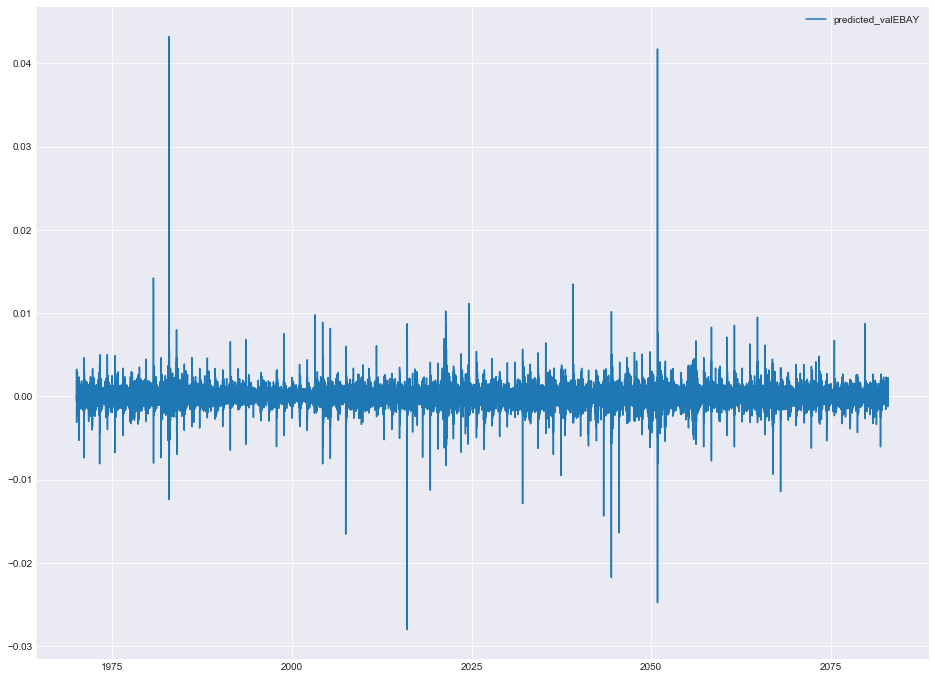

In [82]:
df['predicted_valEBAY'] = ARIMIAmodEBAY.predict()
df[['predicted_valEBAY']].plot(figsize=(16, 12))